In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
fuel_econ = pd.read_csv('fuel-econ.csv')
print(fuel_econ.shape)
fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Avg. Combined Fuel Eff. (mpg)')

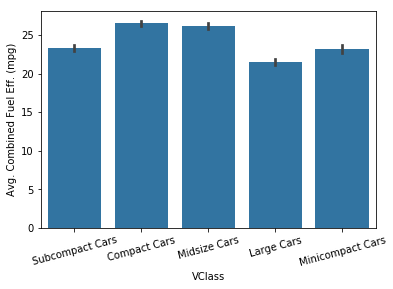

In [4]:
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb',
          color = base_color)
plt.xticks(rotation = 15)
plt.ylabel('Avg. Combined Fuel Eff. (mpg)')

Text(0, 0.5, 'Avg. Combined Fuel Eff. (mpg)')

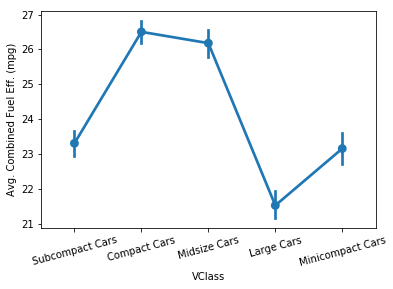

In [5]:
base_color = sb.color_palette()[0]
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb',
          color = base_color)
plt.xticks(rotation = 15)
plt.ylabel('Avg. Combined Fuel Eff. (mpg)')

Text(0, 0.5, 'Avg. Combined Fuel Eff. (mpg)')

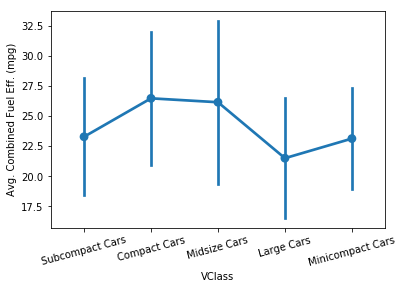

In [6]:
base_color = sb.color_palette()[0]
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb',
          color = base_color, ci = 'sd')
plt.xticks(rotation = 15)
plt.ylabel('Avg. Combined Fuel Eff. (mpg)')

Text(0, 0.5, 'Avg. Combined Fuel Eff. (mpg)')

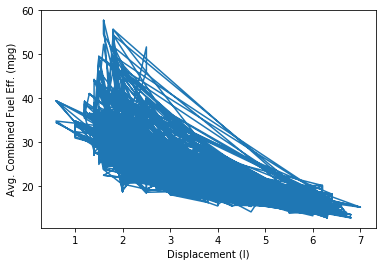

In [9]:
base_color = sb.color_palette()[0]
plt.errorbar(data = fuel_econ, x = 'displ', y = 'comb',
          color = base_color)
plt.xlabel('Displacement (l)')
plt.ylabel('Avg. Combined Fuel Eff. (mpg)')

In [10]:
bins_e = np.arange(0.6, 7+0.2, 0.2)
bins_c = bins_e[:-1] + 0.1

displ_binned = pd.cut(fuel_econ['displ'], bins_e, include_lowest = True)
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()

Text(0, 0.5, 'Avg. Combined Fuel Eff. (mpg)')

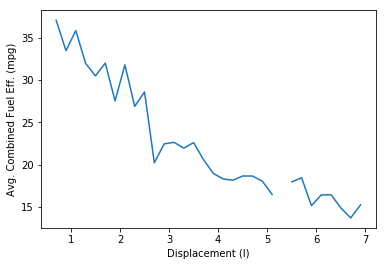

In [11]:
plt.errorbar(x = bins_c, y = comb_mean, color = base_color)
plt.xlabel('Displacement (l)')
plt.ylabel('Avg. Combined Fuel Eff. (mpg)')

Text(0, 0.5, 'Avg. Combined Fuel Eff. (mpg)')

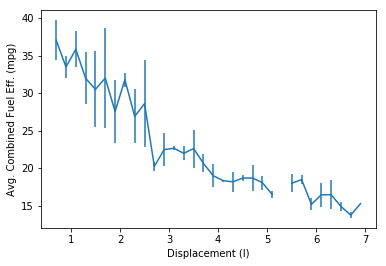

In [12]:
comb_std = fuel_econ['comb'].groupby(displ_binned).std()
plt.errorbar(x = bins_c, y = comb_mean, color = base_color, yerr = comb_std)
plt.xlabel('Displacement (l)')
plt.ylabel('Avg. Combined Fuel Eff. (mpg)')